In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Material properties: fuel compact

In [10]:
T = 1000  # K Heat capacities should be obtained for this T. Appendix IV [1]

H = 79.3  # cm
R = 0.6225  # cm

H /= 100  # m
R /= 100  # m

V = np.pi * H * R**2

# number of particles
npa = 106886

rk = 212.5e-6  # m, kernel radius
rb = 312.5e-6  # m, buffer radius
ri = 347.5e-6  # m, IPyC radius
rs = 382.5e-6  # m, SiC radius
ro = 422.5e-6  # m, OPyC radius

Vk = 4./3*np.pi*rk**3
Vb = 4./3*np.pi*rb**3
Vi = 4./3*np.pi*ri**3
Vs = 4./3*np.pi*rs**3
Vo = 4./3*np.pi*ro**3

Vm = V - npa * Vo   # matrix volume
Vo = npa * (Vo-Vs)  # OPyC volume
Vs = npa * (Vs-Vi)  # SiC Volume
Vi = npa * (Vi-Vb)  # IPyC volume
Vb = npa * (Vb-Vk)  # Buffer volume
Vk = npa * Vk       # kernel volume

rho_k = 10.5*1e3  # kg/m3
rho_b = 1.0*1e3   # kg/m3
rho_i = 1.9*1e3   # kg/m3
rho_s = 3.2*1e3   # kg/m3 <-------- this value may be wrong, check
rho_o = 1.9*1e3   # kg/m3
rho_m = 1.75*1e3  # kg/m3

cp_m = 0.54212 - 2.42667e-6 * T - 90.2725*1/T - 43449.3*1/T**2 + 1.59309e7*1/T**3 - 1.43688e9*1/T**4
cp_m *= 4184  # J/kg/K

cp_b = cp_m
cp_i = cp_m
cp_o = cp_m

cp_s = 925.65 + 0.3772*T - 7.9259e-5*T**2 - 3.1946e7/T**2  # J/kg/K

def C2(B):
    return 8.463e-3*(1+0.011*B)

B = 0  # fluence
cp_k = 302.27*548.68**2/T**2*np.exp(548.68/T)/(np.exp(548.68/T)-1)**2
cp_k += 2*C2(B)*T
cp_k += 8.741e7*18531.7*np.exp(-18531.7/T)/T**2  # J/kg/K

rho_eff = rho_k * Vk
rho_eff += rho_b * Vb
rho_eff += rho_i * Vi
rho_eff += rho_s * Vs
rho_eff += rho_o * Vo
rho_eff += rho_m * Vm

cp_eff = rho_k * Vk * cp_k
cp_eff += rho_b * Vb * cp_b
cp_eff += rho_i * Vi * cp_i
cp_eff += rho_s * Vs * cp_s
cp_eff += rho_o * Vo * cp_o
cp_eff += rho_m * Vm * cp_m

cp_eff /= rho_eff
rho_eff /= V

k_eff = 20  # W/m/K [1] fuel compact
# [1] makes the distinction between fuel compact and fuel block
# k_eff = 37  # W/m/K [1] fuel block

print('rho:' , rho_eff, ' kg/m3 = ', rho_eff/1e6, ' kg/cm3')
print('cp:' , cp_eff, ' J/kg/K')
print('rho * cp:' , rho_eff*cp_eff/1e6, ' 10^6 J/m3/K')

# USNC - MMR
# Effective heat capacity: 3.84 10^6 J/m^3 [3]
# Effective conductivity of MMR compact: 10.2 W/m/K [3]
# Maxwell-Euken formula [3]

# Effective conductivity: AMEC Compact Model [1]

rho: 2182.263391737115  kg/m3 =  0.002182263391737115  kg/cm3
cp: 1217.1128192882009  J/kg/K
rho * cp: 2.6560607491465915  10^6 J/m3/K


# Material properties: coolant

[227. 277. 327. 377. 427. 477. 527. 577. 627. 677. 727.]
[6.0629 5.521  5.068  4.6836 4.3533 4.0665 3.8152 3.593  3.3953 3.2183
 3.0587]


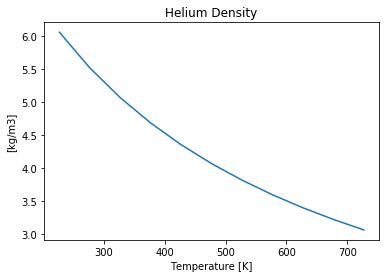

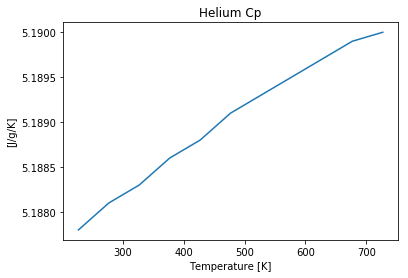

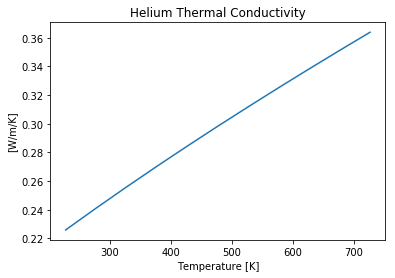

In [4]:
# NIST P=6.4MPa Tave=750K
rho = 4.056  # kg/m3
cp = 5.189   # J/g/K
k = 0.29881  # W/m/K

# NIST P=6.4MPa
# See example 8 of moose for using this values in the material block of moltres
df = pd.read_csv('helium.csv')
tl = np.array(df['Temperature (K)'].tolist())
rhol = np.array(df['Density (kg/m3)'].tolist())
cpl = np.array(df['Cp (J/g*K)'].tolist())
kl = np.array(df['Therm. Cond. (W/m*K)'].tolist())

tl -= 273
print(tl)
print(rhol)

plt.figure(1)
plt.plot(tl, rhol)
plt.ylabel('[kg/m3]')
plt.xlabel('Temperature [K]')
plt.title('Helium Density')

plt.figure(2)
plt.plot(tl, cpl, label='Cp')
plt.ylabel('[J/g/K]')
plt.xlabel('Temperature [K]')
plt.title('Helium Cp')

plt.figure(3)
plt.plot(tl, kl, label='Therm. Cond.')
plt.ylabel('[W/m/K]')
plt.xlabel('Temperature [K]')
plt.title('Helium Thermal Conductivity')

# [1] cp should be the value for 1000 K
k = 0.41  # W/m/K

In [ ]:
# Formula

# Material properties: Moderator

In [ ]:
# [1] fuel block
k_eff = 37  # W/m/K

# [1] moderator: Grade H-451 graphite
kg = 66  # W/m/K



# Power density

# Flow velocity

# References

[1] - OECD NEA. Benchmark. 2017.

[2] - NIST:
https://webbook.nist.gov/cgi/fluid.cgi?P=6.4&TLow=512&THigh=992&TInc=20&Applet=on&Digits=5&ID=C7440597&Action=Load&Type=IsoBar&TUnit=K&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF

[3] - Hawari, A., Venneri, F. Development and Deployment Assessment of a Melt-Down Proof Modular Micro Reactor (MDP-MMR). 2018.


In [22]:
# TH-temp/2.i: 3D - unitcell
# Those two will be eliminated in the future
qvol = 5.9  # W/cm3

rho_v = 16.88055  # g/cm2/s
rho = 4.056e-3  # g/cm3
cp = 5.1891 # J/g/K
k = 0.0029881  # W/cm/K

In [24]:
# TH-temp3/4.i: 2D-unitcell

qvol = 5e-3
vel = 1

# coolant
rho = 5.07e-3  # g/cm3
cp = 5.188  # J/g/K
k = 0.002357  # W/cm/K

# fuel
rho = 2.1822  # g/cm3
cp = 1.217  # J/g/K
k = 0.2  # W/cm/K

# moderator
rho = 1.85  # g/cm3
cp = 1.5198  # J/g/K
k = 0.66  # W/cm/K